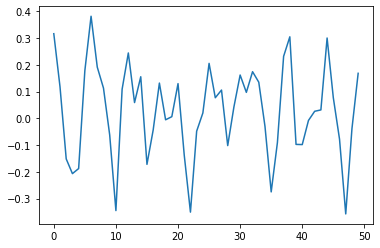

In [1]:
import matplotlib.pyplot as plt
import math, random
import numpy as np
    
def generate_pos(k1, k2, r):
    return list(zip([k2*math.cos(k1*i)+random.uniform(-r,r) for i in range(1000)],[k1*math.sin(k2*i)+random.uniform(-r,r) for i in range(1000)]))

pos = np.array(generate_pos(1, 0.2, 0.2))

y_cos = pos.T[0]
y_sin = pos.T[1]

plt.plot(np.arange(50), y_cos[:50])

In [2]:
class Model:
    def __init__(self, scatter):
        self.scatter = scatter
        self.k1 = None
        self.k2 = None
        
    def fit(self, X_train, y_train):
        y_cos = y_train.T[0]
        y_sin = y_train.T[1]
        
#         maxes_sin = self.union_maxes(self.find_maxes(y_sin))
#         period_sin = self.find_period(maxes_sin[0])
        
#         maxes_cos = self.union_maxes(self.find_maxes(y_cos))
#         period_cos = self.find_period(maxes_cos[0])
        
#         self.k1 = 2 * math.pi / period_sin
#         self.k2 = 2 * math.pi / period_cos
        
        self.k1 = round((abs(y_sin[y_sin > 0].mean() * math.pi / 2) + 
            abs(y_sin[y_sin < 0].mean() * math.pi / 2)) / 2, 1)
        self.k2 = round((abs(y_cos[y_cos > 0].mean() * math.pi / 2) + 
            abs(y_cos[y_cos < 0].mean() * math.pi / 2)) / 2, 1)
        
    def find_period(self, maxes):
        period_arr = []
        
        for maximumIndex in range(len(maxes)):
            if maximumIndex + 1 == len(maxes): break
            period_arr.append(maxes[maximumIndex + 1] - maxes[maximumIndex])
        
        return np.array(period_arr).mean()
    
    def find_maxes(self, y_train):
        maxes = []
        for i in range(len(y_train)):
            if i <= self.scatter or i + self.scatter >= len(y_train): continue
            if max(y_train[i - self.scatter : i]) < y_train[i] and y_train[i] > max(y_train[i + 1 : i + self.scatter]):
                maxes.append((i, y_train[i]))
        return maxes
    
    def union_maxes(self, y_train):
        y = np.array(y_train).T[1]
        x = np.array(y_train).T[0]
        
        meanx_half = x.mean() * 0.5
        meany_half = y.mean() * 0.5
        
        return (x[x >= meanx_half], y[y >= meany_half])
    
    def predict(self):
        data_2000 = np.arange(1000, 2000)
        return np.array([self.k1 * np.sin(self.k2 * data_2000), self.k2 * np.cos(self.k1 * data_2000)])

1.0 0.2


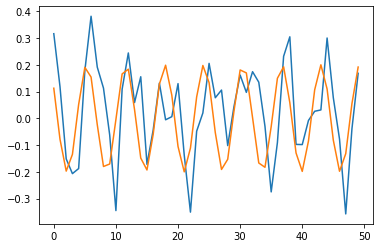

In [3]:
model_ = Model(2)

model_.fit(np.arange(1000), pos)
predicted = model_.predict()

print(model_.k1, model_.k2)

plt.plot(np.arange(50), y_cos[:50])
plt.plot(np.arange(50), predicted[1][:50])

In [4]:
import numpy as np

def eval(data):
    data_np = np.array(data)

    k2 = data_np[0][0]
    k1 = data_np[1][1] / np.sin(k2)

    learning_rate = 0.00000001
    
#     loss_func = np.array([(pos[i][1] - k1 * np.sin(k2 * i)) ** 2 for i in range(100)])
#     plt.plot(np.arange(100), loss_func)
    
    for j in range(500):
        # f(y, k1, k2) = (y - k1 * sin(k2 * t))^2
        # df/dk1 = 2 * (y - k1 * math.sin(k2 * i)) * (-k1)
        # df/dk2 = 2 * (y - k1 * math.sin(k2 * i)) * (-k1 * math.cos(k2 * i) * i)
        
        a = np.sum(np.array([2 * (data_np[i][1] - k1 * np.sin(k2 * i)) * (-k1) for i in range(1000)]))
        b = np.sum(np.array([2 * (data_np[i][1] - k1 * np.sin(k2 * i)) * (-k1 * np.cos(k2 * i) * i) for i in range(1000)]))

        k1 -= learning_rate * a
        k2 -= learning_rate * b

        learning_rate -= learning_rate / 10

    data_2000 = np.arange(1000, 2000)

    pr_cos = (k2 * np.cos(k1 * data_2000))
    pr_sin = (k1 * np.sin(k2 * data_2000))

    np_prediction = np.array([pr_cos, pr_sin]).T

    return ((k1, k2), list(map(lambda x: tuple(x), list(np_prediction))))

# np.array([np.array(eval(generate_pos(1, 0.2, 0.1))[0]) for i in range(10)]).mean(axis = 0)

iter count: 500
929.9456926179948 907.7135537036893


((0.9103328102829067, 1.9068900217739715),
 (0.9103235008857561, 1.903985199865549))

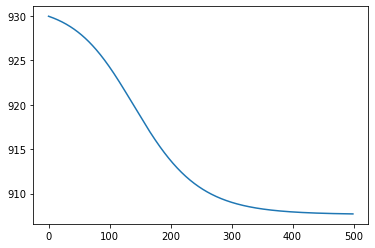

In [11]:
import numpy as np

def eval_(data):
    data_np = np.array(data)

    k2 = data_np[0][0]
    k1 = data_np[1][1] / np.sin(k2)

#     learning_rate = 0.000000001
    learning_rate = 0.000000001
    
    k_b = (k1, k2)
    
    loss = []
    
    iter_count = 0
    
    while (np.array([(data_np[i][1] - k1 * np.sin(k2 * i)) ** 2 for i in range(1000)]).mean() > 0.01 and iter_count < 500):
        # f(y, t, k1, k2) = (y - k1 * sin(k2 * t))^2
        # df/dk1 = 2 * (y - k1 * math.sin(k2 * i)) * (-k1)
        # df/dk2 = 2 * (y - k1 * math.sin(k2 * i)) * (-k1 * math.cos(k2 * i) * i)
        
        loss.append(np.array([(data_np[i][1] - k1 * np.sin(k2 * i)) ** 2 for i in range(1000)]).sum())
    
        a = np.sum(np.array([2 * (data_np[i][1] - k1 * np.sin(k2 * i)) * (-k1) for i in range(1000)]))
        b = np.sum(np.array([2 * (data_np[i][1] - k1 * np.sin(k2 * i)) * (-k1 * np.cos(k2 * i) * i) for i in range(1000)]))

        k1 -= learning_rate * a
        k2 -= learning_rate * b

#         learning_rate -= learning_rate / 10
        
        iter_count += 1
    
    print("iter count: {0}".format(iter_count))
    
    plt.plot(np.arange(len(loss)), loss)
    print(loss[0], loss[len(loss) - 1])

    data_2000 = np.arange(1000, 2000)

    pr_cos = (k2 * np.cos(k1 * data_2000))
    pr_sin = (k1 * np.sin(k2 * data_2000))

    np_prediction = np.array([pr_cos, pr_sin]).T

    return (k_b, (k1, k2), list(map(lambda x: tuple(x), list(np_prediction))))

# np.array([np.array(eval(generate_pos(1, 0.2, 0.1))[0]) for i in range(10)]).mean(axis = 0)

eval_(generate_pos(1, 2, 0.2))[: 2]

init k1: 1.0902748593462992
best k1: 0.43610994373851963
iter count: 40000
init loss: 0.750157231933333; min loss: 0.750157231933333
----
init k2: 0.2858034147166068
19999
best k2: 0.20169718583379181
iter count: 39999
init loss: 0.7584379937677813; min loss: 0.2552441651697718


((0.43610994373851963, 0.2858034147166068),
 (0.43610994373851963, 0.20169718583379181))

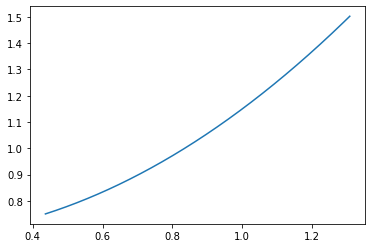

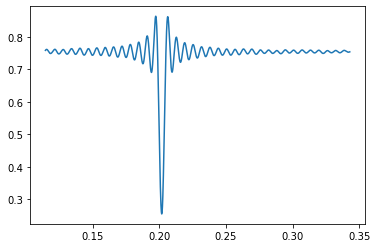

In [87]:
import numpy as np

def eval_(data):
    data_np = np.array(data)

    k2 = data_np[0][0]
    k1 = data_np[1][1] / np.sin(k2)
    
    step_k1 = abs((2 * k1 * 0.001) / 100)
    step_k2 = abs((2 * k2 * 0.001) / 100)
    
    border_k1 = abs((2 * k1 * 30) / 100)
    border_k2 = abs((2 * k2 * 30) / 100)
    
    k1s = []
    loss = []
    min_loss = -1
    iter_count = 0
    
    print("init k1: {0}".format(k1))
    
    k1 -= border_k1
    for j in range(int(abs(2 * k1 / step_k1))):
        loss.append(np.array([(data_np[i][1] - k1 * np.sin(k2 * i)) ** 2 for i in range(1000)]).mean())
        if min_loss < 0 or loss[-1] < min_loss:
            min_loss = loss[-1]
            best_k1 = k1
        k1s.append(k1)

        k1 += step_k1
        iter_count += 1
    
    print('best k1: {0}'.format(best_k1))
    print("iter count: {0}".format(iter_count))
    print("init loss: {0}; min loss: {1}".format(loss[0], min_loss))
    print("----")
    
    fig_2, ax_2 = plt.subplots()
    ax_2.plot(k1s, loss)
    
    k1 = best_k1
    
    k_b = (k1, k2)
    k2s = []
    loss = []
    min_loss = -1

    iter_count = 0
    
    print("init k2: {0}".format(k2))
    
    k2 -= border_k2
    
    print(int(k2 / step_k2))
    
    for j in range(int(abs(2 * k2 / step_k2))):
        loss.append(np.array([(data_np[i][1] - k1 * np.sin(k2 * i)) ** 2 for i in range(1000)]).mean())
        if min_loss < 0 or loss[-1] < min_loss:
            min_loss = loss[-1]
            best_k2 = k2
        k2s.append(k2)

        k2 += step_k2
        iter_count += 1
        
    print('best k2: {0}'.format(best_k2))
    print("iter count: {0}".format(iter_count))
    print("init loss: {0}; min loss: {1}".format(loss[0], min_loss))
    
    
    fig_1, ax_1 = plt.subplots()
    ax_1.plot(k2s, loss)
    
    k2 = best_k2
    
    data_2000 = np.arange(1000, 2000)

    pr_cos = (k2 * np.cos(k1 * data_2000))
    pr_sin = (k1 * np.sin(k2 * data_2000))

    np_prediction = np.array([pr_cos, pr_sin]).T

    return (k_b, (k1, k2), list(map(lambda x: tuple(x), list(np_prediction))))

eval_(generate_pos(1.1491, 0.2017, 0.1))[: 2]